# TITLE

## Import the libs and Load the datasets

In [49]:
# Import libraries

# Data Loading
import numpy as np
import pandas as pd

# Data Querying
import pandasql as ps

# Modelling
import statsmodels.formula.api as smf

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from statsmodel
    :return df: <pandas DataFrame> combined estimated coefficient and standard error of model estimate
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

In [51]:
def impute(data, value):
    """
    Function to impute a missing data (array-like) with a certain value
    
    :param data: array-like, the data with missing values
    :param value: float/int, the value to use for imputing missing values
    :return imputed_array: array-like, the imputed data
    """    
    # Check for each element in data 
    # return True if it's a missing values (represented as NaN in numpy) 
    # return False otherwise.
    bool_nan = np.isnan(data)
    
    # Return the value a_impute where a is missing and returns a otherwise
    imputed_data = np.where(bool_nan, value, data)
    
    return imputed_data

In [52]:
def simple_rand_impute(a):
    
    # Array containin boolearn, True if the element in a is missing, False otherwise
    missing = pd.isnull(a)
    
    # Number of missing value
    n_missing = sum(missing)
    
    # a observation that's not missing
    a_obs = a[~missing]
    
    # Copy of a
    imputed = a.copy()
    
    # Impute missing value with random observation that's not missing
    imputed[missing] = np.random.choice(a_obs, size=n_missing)
    
    return imputed

In [53]:
# Load dataset: Movie Titles
df_mv_titles = pd.read_csv("movie_titles.csv")
df_mv_titles.head()

,Title,Domestic,International,Budget,Distributor,MPAA-Rating,Runtime,Genres
0,Jurassic World (2015),652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Action;Adventure;Sci-Fi
1,Star Wars: Episode VII - The Force Awakens (2015),936662225,1131561399,245000000.0,Walt Disney Studios Motion Pictures,PG-13,138,Action;Adventure;Sci-Fi
2,Avengers: Age of Ultron (2015),459005868,943800000,250000000.0,Walt Disney Studios Motion Pictures,PG-13,141,Action;Adventure;Sci-Fi
3,Inside Out (2015),356461711,501149463,175000000.0,Walt Disney Studios Motion Pictures,PG,95,Adventure;Animation;Comedy;Drama;Family;Fantasy
4,Furious 7 (2015),353007020,1162040651,190000000.0,Universal Pictures,PG-13,137,Action;Adventure;Thriller


In [54]:
# Load dataset: Movie Daily Earnings
df_mv_daily_earnings = pd.read_csv("movie_daily_earnings.csv")
df_mv_daily_earnings.head()

,Movie_Title,Date,Daily,Theaters,Rank
0,Jurassic World (2015),2015-06-12,81953950,4274.0,1
1,Jurassic World (2015),2015-06-13,69644830,4274.0,1
2,Jurassic World (2015),2015-06-14,57207490,4274.0,1
3,Jurassic World (2015),2015-06-15,25344820,4274.0,1
4,Jurassic World (2015),2015-06-16,24342515,4274.0,1


## Check Missing Value

In [55]:
#Check missing value: Movie Titles
df_mv_titles.isnull().sum()/df_mv_titles.shape[0]*100

Title             0.000000
Domestic          0.000000
International     0.000000
Budget           32.147059
Distributor       0.029412
MPAA-Rating       4.588235
Runtime           0.000000
Genres            0.088235
dtype: float64

Movie Tiltes: variable(s) with missing value:
1. Budget (32%)
2. Distributor (0.03%)
3. MPAA-Rating (4.5%)
4. Genres (0.09%)

In [56]:
#Check missing value: Movie Daily Earnings
df_mv_daily_earnings.isnull().sum()/df_mv_daily_earnings.shape[0]*100

Movie_Title    0.000000
Date           0.000000
Daily          0.000000
Theaters       0.017319
Rank           0.000000
dtype: float64

Movie Daily Earnings: variable(s) with missing value:
1. Theaters (0.17%)

## Data Imputation

### Movie Daily Earnings Table

#### Standardize the table header

In [57]:
# Change the headers of the table
dict = {'Movie_Title': 'title',
        'Date': 'date',
        'Daily': 'daily',
        'Theaters': 'theaters',
        'Rank': 'rank'
        }
 
# Rename the headers based on the dict using rename () method
df_mv_daily_earnings.rename(columns=dict, inplace=True)
 

#### Handling Missing Values of Categotical Variables
We'll use simple random imputation to handle missing value of these categorical variables:
1. Theaters

In [58]:
# Fill the Theater's missing value using simple random imputation
df_mv_daily_earnings['imp_theaters'] = simple_rand_impute(df_mv_daily_earnings['theaters'])

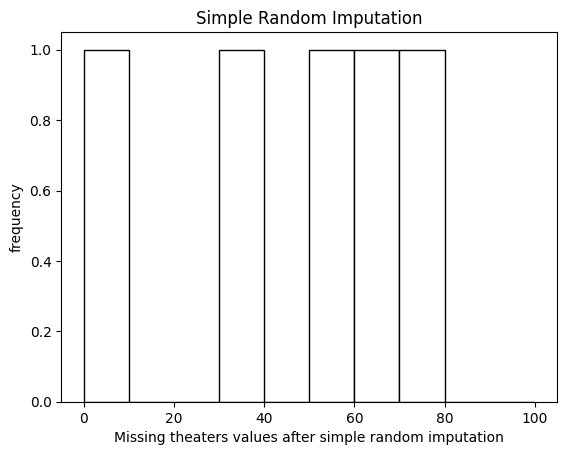

In [59]:
# Check the distribution of genres imputed values
# Store the genre imputed values df as a object
missing_theaters = df_mv_daily_earnings["theaters"].isnull()

# Create a new dataframe consisting only distributor column with missing values and the imputed value counterpart
df_mv_daily_earnings_missing_theaters = df_mv_daily_earnings[missing_theaters][["theaters","imp_theaters"]].copy()

# Plot the imputed distributor value as a bar chart
plt.hist(df_mv_daily_earnings_missing_theaters["imp_theaters"], bins = np.arange(0, 101, 10), color='white', edgecolor='black')
plt.xlabel('Missing theaters values after simple random imputation')
plt.ylabel('frequency')
plt.title('Simple Random Imputation')
plt.show()


In [60]:
# # Fill the Theater's missing value using the mode
# df_mv_daily_earnings['Theaters'].fillna(df_mv_daily_earnings['Theaters'].mode()[0], inplace=True)


In [61]:
#Check the missing value again: Movie Daily Earnings
df_mv_daily_earnings.isnull().sum()/df_mv_daily_earnings.shape[0]*100

title           0.000000
date            0.000000
daily           0.000000
theaters        0.017319
rank            0.000000
imp_theaters    0.000000
dtype: float64

Note: No longer any missing value in Movie Daily Earnings dataset

### Movie Titles Table

#### Standardize the table header

In [62]:
# Change the headers of the table
dict = {'Title': 'title',
        'Domestic': 'domestic',
        'International': 'international',
        'Budget': 'budget',
        'Distributor': 'distributor',
        'MPAA-Rating': 'mpaa_rating',
        'Runtime': 'runtime',
        'Genres': 'genres'
        }
 
# Rename the headers based on the dict using rename () method
df_mv_titles.rename(columns=dict, inplace=True)
 

#### Handling Missing Values of Categotical Variables

We'll use mode-imputation to handle missing value of these categorical variables:
1. Distributor
2. MPAA-Rating
3. Genres

In [63]:
# Fill these missing value using simple random imputation
df_mv_titles['imp_distributor'] = simple_rand_impute(df_mv_titles['distributor'])
df_mv_titles['imp_genres'] = simple_rand_impute(df_mv_titles['genres'])
df_mv_titles['imp_mpaa_rating'] = simple_rand_impute(df_mv_titles['mpaa_rating'])

In [64]:
# # Fill the Distributor's missing value using the mode
# df_mv_titles['distributor'].fillna(df_mv_titles['distributor'].mode()[0], inplace=True)
# df_mv_titles['mpaa_rating'].fillna(df_mv_titles['mpaa_rating'].mode()[0], inplace=True)
# df_mv_titles['genres'].fillna(df_mv_titles['genres'].mode()[0], inplace=True)

<Axes: xlabel='imp_distributor'>

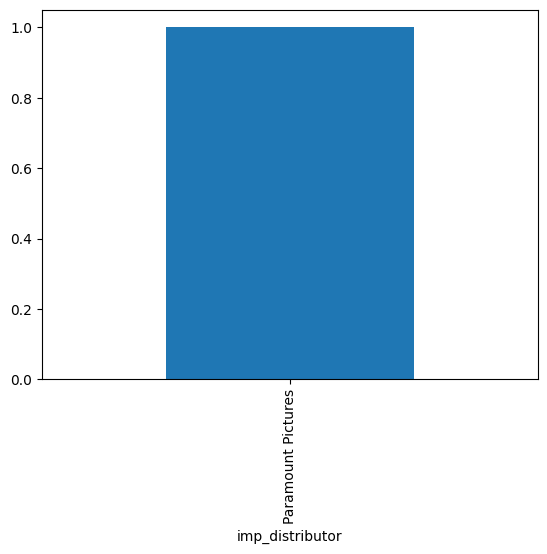

In [65]:
# Check the distribution of distributor imputed values
# Store the distributor imputed values df as a object
missing_distributor = df_mv_titles["distributor"].isnull()

# Create a new dataframe consisting only distributor column with missing values and the imputed value counterpart
df_mv_titles_missing_distibutor = df_mv_titles[missing_distributor][["distributor","imp_distributor"]].copy()

# Plot the imputed distributor value as bar chart
df_mv_titles_missing_distibutor['imp_distributor'].value_counts().plot(kind='bar')

<Axes: xlabel='imp_genres'>

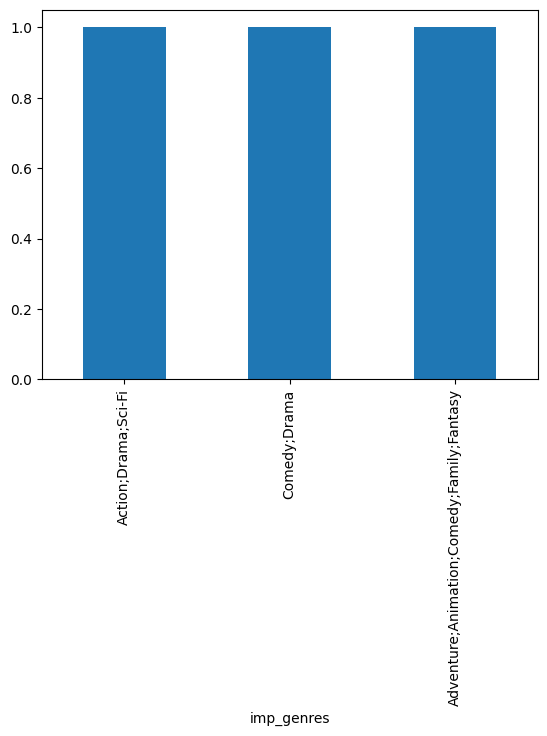

In [66]:
# Check the distribution of genres imputed values
# Store the genre imputed values df as a object
missing_genres = df_mv_titles["genres"].isnull()

# Create a new dataframe consisting only distributor column with missing values and the imputed value counterpart
df_mv_titles_missing_genres = df_mv_titles[missing_genres][["genres","imp_genres"]].copy()

# Plot the imputed distributor value as a bar chart
df_mv_titles_missing_genres['imp_genres'].value_counts().plot(kind='bar')

<Axes: xlabel='imp_mpaa_rating'>

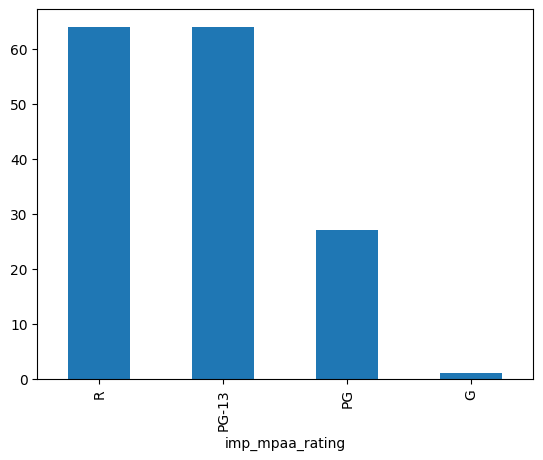

In [67]:
# Check the distribution of mpaa_rating imputed values
# Store the mpaa_rating imputed values df as a object
missing_mpaa_rating = df_mv_titles["mpaa_rating"].isnull()

# Create a new dataframe consisting only distributor column with missing values and the imputed value counterpart
df_mv_titles_missing_mpaa_rating = df_mv_titles[missing_mpaa_rating][["mpaa_rating","imp_mpaa_rating"]].copy()

# Plot the imputed distributor value as a bar chart
df_mv_titles_missing_mpaa_rating['imp_mpaa_rating'].value_counts().plot(kind='bar')

In [68]:
#Check again the missing value: Movie Titles
df_mv_titles.isnull().sum()/df_mv_titles.shape[0]*100

title               0.000000
domestic            0.000000
international       0.000000
budget             32.147059
distributor         0.029412
mpaa_rating         4.588235
runtime             0.000000
genres              0.088235
imp_distributor     0.000000
imp_genres          0.000000
imp_mpaa_rating     0.000000
dtype: float64

Note: There's no longer any missing value in those categorical variables.

#### Handling Missing Values of Numerical Variable

There's one numerical variable with missing values:
1. Budget

We'll use these imputation methods to handle the missing value and find which method perform the best.
1. Complete Case Analysis
2. Deterministic Regression Imputation
3. Random Regression Imputation

##### 1. Complete Case Analysis

**Evaluate the dataset shape**

In [69]:
# Check the size of our original data
df_mv_titles.shape

(3400, 11)

In [70]:
# Drop all rows that contain missing data
df_mv_titles_compl_case = df_mv_titles.dropna(axis = 0)

# Check the size of data after row deletion
df_mv_titles_compl_case.shape

(2257, 11)

- We get that the table contains 2307 rows of complete data
- We'll build a regression model based on this complete data and evaluation it

In [71]:
df_mv_titles_compl_case.head()

,title,domestic,international,budget,distributor,mpaa_rating,runtime,genres,imp_distributor,imp_genres,imp_mpaa_rating
0,Jurassic World (2015),652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Action;Adventure;Sci-Fi,Universal Pictures,Action;Adventure;Sci-Fi,PG-13
1,Star Wars: Episode VII - The Force Awakens (2015),936662225,1131561399,245000000.0,Walt Disney Studios Motion Pictures,PG-13,138,Action;Adventure;Sci-Fi,Walt Disney Studios Motion Pictures,Action;Adventure;Sci-Fi,PG-13
2,Avengers: Age of Ultron (2015),459005868,943800000,250000000.0,Walt Disney Studios Motion Pictures,PG-13,141,Action;Adventure;Sci-Fi,Walt Disney Studios Motion Pictures,Action;Adventure;Sci-Fi,PG-13
3,Inside Out (2015),356461711,501149463,175000000.0,Walt Disney Studios Motion Pictures,PG,95,Adventure;Animation;Comedy;Drama;Family;Fantasy,Walt Disney Studios Motion Pictures,Adventure;Animation;Comedy;Drama;Family;Fantasy,PG
4,Furious 7 (2015),353007020,1162040651,190000000.0,Universal Pictures,PG-13,137,Action;Adventure;Thriller,Universal Pictures,Action;Adventure;Thriller,PG-13


**Build the regression model**

In [72]:
# # Create the OLS model object and fit the model
# model_cca = smf.ols("budget ~ domestic + international + C(distributor) \
#                                 + C(mpaa_rating) + runtime \
#                                 + C(genres)", df_mv_titles_compl_case).fit()

In [73]:
# Create the OLS model object and fit the model: without the categorical variable
model_cca = smf.ols("budget ~ domestic + international + runtime", df_mv_titles_compl_case).fit()

Note: Distributor, MPAA-Rating, and Genres variables are not included because these variables can't be used in other imputation methods. Thus, we can't compare the models' standard error of these variables.

**Evaluate the model and store the evaluation**

In [74]:
r_squared = pd.DataFrame({"rsquared_cca" : [model_cca.rsquared]})
standard_error = pd.DataFrame({"standard_error_cca" : model_cca.bse})

In [75]:
r_squared

,rsquared_cca
0,0.542161


In [76]:
standard_error

,standard_error_cca
Intercept,4.561579e+06
domestic,1.682462e-02
international,9.220469e-03
runtime,4.227784e+04


##### 2. Deterministic Regression Imputation

In [77]:
# Check the percentage of missing value
df_mv_titles.isnull().sum()/df_mv_titles.shape[0]*100

title               0.000000
domestic            0.000000
international       0.000000
budget             32.147059
distributor         0.029412
mpaa_rating         4.588235
runtime             0.000000
genres              0.088235
imp_distributor     0.000000
imp_genres          0.000000
imp_mpaa_rating     0.000000
dtype: float64

We will only use the 68% of the data where all variables is complete as the predictors

In [78]:
# Exclude earning missing cases
df_mv_titles_det = df_mv_titles.dropna(subset=['budget'])

In [79]:
# Check percentage missing value in deterministic dataset
df_mv_titles_det.isnull().sum()/df_mv_titles_det.shape[0]*100

title              0.000000
domestic           0.000000
international      0.000000
budget             0.000000
distributor        0.000000
mpaa_rating        2.167317
runtime            0.000000
genres             0.000000
imp_distributor    0.000000
imp_genres         0.000000
imp_mpaa_rating    0.000000
dtype: float64

**Build a regression model using the complete dataset**

In [80]:
# Create the OLS model object and fit the model
model_imputation_reg = smf.ols("budget ~ domestic + international + runtime", df_mv_titles_det).fit()

Note: Distributor, MPAA-Rating, and Genres variables are not included because there's a value that only exist in the missing row. Thus, there will be and error when we try to predict the target variable.

**Prediction the missing budget variables using the model and impute the result to the missing values**

In [81]:
## Create a predictors dataframe by removing the budget column
df_mv_titles_predictors = df_mv_titles.drop(columns=["budget"])

In [82]:
# Predict the budget using the deterministic model
pred_budget_det = model_imputation_reg.predict(df_mv_titles_predictors)

**Impute the predicted values**

In [83]:
# Impute the budget variables
# Store the complete earnings that imuputed by deterministic value from regression prediction in a new variable

df_mv_titles["imp_budget_det_reg"] = impute(df_mv_titles['budget'], pred_budget_det)

In [84]:
df_mv_titles.isna().sum()

title                    0
domestic                 0
international            0
budget                1093
distributor              1
mpaa_rating            156
runtime                  0
genres                   3
imp_distributor          0
imp_genres               0
imp_mpaa_rating          0
imp_budget_det_reg       0
dtype: int64

- `imp_budget_det_reg` has 0 missing data
- We'll build a regression model using that imputed variable and then evaluate the performance

**Build a regression model using the imputed budget variable**

In [85]:
# Create the OLS model object and fit the model
model_det_reg = smf.ols("imp_budget_det_reg ~ domestic + international + runtime", df_mv_titles).fit()

**Evaluate the model and store the evaluation**

In [86]:

r_squared["rsquared_det_reg"] = model_det_reg.rsquared
standard_error["standard_error_det_reg"] = model_det_reg.bse

In [87]:
r_squared

,rsquared_cca,rsquared_det_reg
0,0.542161,0.591674


In [88]:
standard_error

,standard_error_cca,standard_error_det_reg
Intercept,4.561579e+06,2.952277e+06
domestic,1.682462e-02,1.170837e-02
international,9.220469e-03,6.529237e-03
runtime,4.227784e+04,2.737619e+04


##### 3. Random Regression Imputation

In [89]:
# residual standard deviation
sigma = np.sqrt(model_imputation_reg.mse_resid)

print(f"estimated residual standard deviation from the model: {np.round(sigma,1)}")

estimated residual standard deviation from the model: 35030280.5


**Store each random prediction error in a normal distribution**

In [90]:
np.random.seed(1)

error = np.random.normal(0, sigma, len(df_mv_titles_predictors))

**Predict the missing budget variables using the model and the randomized error and then impute the predicted values**

In [91]:
# Predict the values using the model and the error
pred_budget_rand_reg = model_imputation_reg.predict(df_mv_titles_predictors) + error

# Impute missing earning with prediction results
df_mv_titles["imp_budget_rand_reg"] = impute(df_mv_titles['budget'], pred_budget_rand_reg)

In [92]:
# Check total missing data where earnings are imputed and stored in `imp_earnings_rand_reg`

df_mv_titles.isna().sum()

title                     0
domestic                  0
international             0
budget                 1093
distributor               1
mpaa_rating             156
runtime                   0
genres                    3
imp_distributor           0
imp_genres                0
imp_mpaa_rating           0
imp_budget_det_reg        0
imp_budget_rand_reg       0
dtype: int64

- `imp_budget_rand_reg` has 0 missing data
- We'll then build a regression model based on that imputed budget values

**Build regression model**

In [93]:
# Create the OLS model object and fit the model
model_rand_reg = smf.ols("imp_budget_rand_reg ~ domestic + international + runtime", df_mv_titles).fit()

**Evaluate the model and store the evaluation**

In [94]:

r_squared["rsquared_rand_reg"] = model_rand_reg.rsquared
standard_error["standard_error_rand_reg"] = model_rand_reg.bse

In [95]:
r_squared

,rsquared_cca,rsquared_det_reg,rsquared_rand_reg
0,0.542161,0.591674,0.493344


In [96]:
standard_error

,standard_error_cca,standard_error_det_reg,standard_error_rand_reg
Intercept,4.561579e+06,2.952277e+06,3.578436e+06
domestic,1.682462e-02,1.170837e-02,1.419164e-02
international,9.220469e-03,6.529237e-03,7.914048e-03
runtime,4.227784e+04,2.737619e+04,3.318251e+04


**Decision:** we'll use the budget variable imputed using deterministic regression for our analysis since it has the largest r-squared score and smallest standard error.

## Join the Tables using Pandasql

In [100]:
query_join_movie_tables = """
SELECT *
FROM df_mv_titles AS mvt
JOIN df_mv_daily_earnings AS mvde
ON mvt.title = mvde.title
"""

df_mv_joined = ps.sqldf(query_join_movie_tables, locals())
df_mv_joined

,title,domestic,international,budget,distributor,mpaa_rating,runtime,genres,imp_distributor,imp_genres,imp_mpaa_rating,imp_budget_det_reg,imp_budget_rand_reg,title,date,daily,theaters,rank,imp_theaters
0,Jurassic World (2015),652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Action;Adventure;Sci-Fi,Universal Pictures,Action;Adventure;Sci-Fi,PG-13,1.500000e+08,1.500000e+08,Jurassic World (2015),2015-06-12,81953950,4274.0,1,4274.0
1,Jurassic World (2015),652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Action;Adventure;Sci-Fi,Universal Pictures,Action;Adventure;Sci-Fi,PG-13,1.500000e+08,1.500000e+08,Jurassic World (2015),2015-06-13,69644830,4274.0,1,4274.0
2,Jurassic World (2015),652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Action;Adventure;Sci-Fi,Universal Pictures,Action;Adventure;Sci-Fi,PG-13,1.500000e+08,1.500000e+08,Jurassic World (2015),2015-06-14,57207490,4274.0,1,4274.0
3,Jurassic World (2015),652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Action;Adventure;Sci-Fi,Universal Pictures,Action;Adventure;Sci-Fi,PG-13,1.500000e+08,1.500000e+08,Jurassic World (2015),2015-06-15,25344820,4274.0,1,4274.0
4,Jurassic World (2015),652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Action;Adventure;Sci-Fi,Universal Pictures,Action;Adventure;Sci-Fi,PG-13,1.500000e+08,1.500000e+08,Jurassic World (2015),2015-06-16,24342515,4274.0,1,4274.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254057,A Call to Spy (2020),159014,681026,NaN,IFC Films,PG-13,123,Biography;Crime;Drama;Thriller;War,IFC Films,Biography;Crime;Drama;Thriller;War,PG-13,3.697069e+07,1.652785e+07,A Call to Spy (2020),2020-11-17,623,8.0,17,8.0
254058,A Call to Spy (2020),159014,681026,NaN,IFC Films,PG-13,123,Biography;Crime;Drama;Thriller;War,IFC Films,Biography;Crime;Drama;Thriller;War,PG-13,3.697069e+07,1.652785e+07,A Call to Spy (2020),2020-11-18,568,8.0,17,8.0
254059,A Call to Spy (2020),159014,681026,NaN,IFC Films,PG-13,123,Biography;Crime;Drama;Thriller;War,IFC Films,Biography;Crime;Drama;Thriller;War,PG-13,3.697069e+07,1.652785e+07,A Call to Spy (2020),2020-11-19,597,8.0,17,8.0
254060,Love Story (2020),153504,153504,NaN,Fathom Events,PG,100,Drama;Romance,Fathom Events,Drama;Romance,PG,2.720349e+07,-2.690033e+07,Love Story (2020),2020-02-09,87198,650.0,20,650.0


In [105]:
query_join_movie_tables = """
SELECT
    mvt.title AS title,
    mvt.domestic AS dom_earning,
    mvt.international AS int_earning,
    mvt.imp_budget_det_reg AS budget,
    ((mvt.domestic + mvt.international - mvt.imp_budget_det_reg)/mvt.imp_budget_det_reg) AS profit_margin,
    mvt.imp_distributor AS distributor,
    mvt.imp_mpaa_rating AS mpaa_rating,
    mvt.runtime AS runtime,
    mvt.imp_genres AS genres
FROM
    df_mv_titles AS mvt
JOIN
    df_mv_daily_earnings AS mvde
ON
    mvt.title = mvde.title
GROUP BY mvt.title
"""

df_mv_joined = ps.sqldf(query_join_movie_tables, locals())
df_mv_joined

,title,dom_earning,int_earning,budget,profit_margin,distributor,mpaa_rating,runtime,genres
0,10 Cloverfield Lane (2016),72082998,38134000,4.129626e+07,1.668934,Paramount Pictures,PG-13,103,Action;Drama;Horror;Sci-Fi;Thriller
1,"10,000 BC (2008)",94784201,175000000,1.050000e+08,1.569373,Warner Bros.,PG-13,109,Action;Adventure;Drama;Fantasy;History
2,102 Dalmatians (2000),66957026,116654745,8.500000e+07,1.160138,Walt Disney Studios Motion Pictures,PG-13,100,Adventure;Comedy;Family
3,12 Rounds (2009),12234694,5045632,3.245861e+07,-0.467620,Twentieth Century Fox,PG-13,108,Action;Crime;Thriller
4,12 Strong (2018),45819713,21631102,4.749780e+07,0.420083,Warner Bros.,R,130,Action;Drama;History;War
...,...,...,...,...,...,...,...,...,...
3395,Zootopia (2016),341268248,682515947,1.807390e+08,4.664436,Walt Disney Studios Motion Pictures,PG,108,Adventure;Animation;Comedy;Crime;Family;Mystery
3396,xXx (2002),142109382,135339000,7.000000e+07,2.963548,Revolution Studios,PG-13,124,Action;Adventure;Thriller
3397,xXx: Return of Xander Cage (2017),44898413,301219864,8.500000e+07,3.071980,Paramount Pictures,PG-13,107,Action;Adventure;Thriller
3398,xXx: State of the Union (2005),26873932,44148761,3.770564e+07,0.883609,Revolution Studios,PG-13,101,Action;Adventure;Crime;Sci-Fi;Thriller


## Create Scatter Matrix

In [ ]:
# def print_coef_std_err(results):
#     """
#     Function to combine estimated coefficients and standard error in one DataFrame
#     :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
#     :return df: <pandas DataFrame> 
#     """
#     coef = results.params
#     std_err = results.bse
    
#     df = pd.DataFrame(data = np.transpose([coef, std_err]), 
#                       index = coef.index, 
#                       columns=["coef","std err"])
#     return df

In [ ]:
# predictor = "x"
# outcome = "y"
# data = fake.copy()
# results_ = results_coef_std.copy()

# # Plot the data
# plt.scatter(data[predictor], data[outcome], marker=".", label="Data", color = "k")

# # Calculate the fitted values
# a_hat = results_.loc["Intercept"]["coef"]
# b_hat = results_.loc[predictor]["coef"]

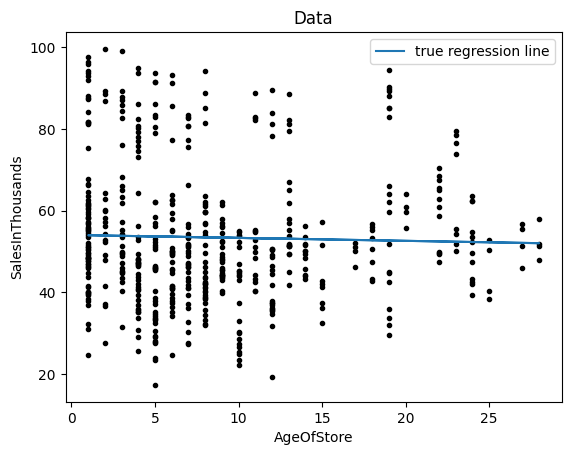

In [20]:
# Plot the data
var_x = "AgeOfStore"
var_y = "SalesInThousands"
a = 54.0786 #variablenya bisa dibikin dynamic
b = -0.072 #variablenya bisa dibikin dynamic

plt.scatter(df[var_x], df[var_y], marker=".", color = "k")
plt.plot(df[var_x], a + b * df[var_x], label = "true regression line")

# Add a legend and labels
plt.legend()
plt.xlabel(var_x)
plt.ylabel(var_y)

# Add a title 
plt.title("Data")
# Show the plot
plt.show()

In [ ]:
#plotting regression line

predictor = "weight"
outcome = "mpg"
data = auto.copy()
results_ = results_weight.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
# plt.legend()
plt.ylabel(outcome)
plt.xlabel(predictor)

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [ ]:
#Plotting residual plot
plt.scatter(results_model_weight.fittedvalues, results_model_weight.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

plt.xlabel("predicted mpg")
plt.ylabel("residual")
plt.title(f"Residuals vs. Predicted mpg")

In [ ]:
#Calculate the R-squared
results_model_weight.rsquared

In [ ]:
#Plot histogram of residual to check the normality
plt.hist(results_model_weight.resid, color='tab:blue', alpha=0.4)
plt.xlabel("residual")
plt.ylabel("count")

plt.show()

In [ ]:
#Log Transformation on a parameter
auto['logweight'] = np.log(auto["weight"])
auto.head(3)

# Create OLS model object
model = smf.ols("mpg ~ logweight", auto)

# Fit the model
results_logtransform = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_weight_log = print_coef_std_err(results_logtransform)

results_logtransform.rsquared

In [ ]:
#Reciprocal transformation on a parameter
auto['rec_weight'] = 1/auto["weight"]
auto.head(3)

# Create OLS model object
model = smf.ols("mpg ~ rec_weight", auto)

# Fit the model
results_rectransform = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_weight_rec = print_coef_std_err(results_rectransform)

results_rectransform.rsquared

In [ ]:
# Visualize the data with log transsformation
predictor = "logweight"
outcome = "mpg"
data = auto.copy()
results_ = results_weight_log.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
# plt.legend()
plt.ylabel(outcome)
plt.xlabel(predictor)

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [ ]:
# # Create a new Variable: Total Earnings
# df_mv_titles["tot_earnings"] = df_mv_titles["Domestic"] + df_mv_titles["International"]